# Chapter07 확률분포

In [20]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "AppleGothic"  # '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

## 7-1.이산확률분포

### 6장 이산확률변수에서 다룬 내용(함수)
-예: 주사위를 던졌을 때 5또는 6이 나오는 경우 

- 상태공간

In [6]:
# ex:두 주사위 눈이 차의 절대값
d1 = [1,2,3,4,5,6]
d2 = [1,2,3,4,5,6]

X = list()
for i in d1:
    for j in d2:
        X.append(abs(i-j))
        
x_set = np.array(list(set(X)))
print(x_set)

[0 1 2 3 4 5]


- 확률질량함수: f(x)

In [6]:
def f(x):
    cnt = 0
    for i in d1:
        for j in d2:
            if abs(i-j) == x:
                cnt += 1
    return cnt / (len(d1)*len(d2))

- 확률변수

In [7]:
X = [x_set, f]

-  확률

In [8]:
prob = np.array([ f(x_k) for x_k in x_set])

---------------------------------------------------------------------

- 평균=기대값(E(X))

In [13]:
def E(X):
    x_set, f = X
    return np.sum([x_k * f(x_k) for x_k in x_set])

In [14]:
#g(x) 함수식 사용
def E(X, g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

- 분산(V(X))

In [15]:
def V(X):
    x_set, f = X
    mean = E(X)
    return np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

In [16]:
#g(x) 함수식 사용
def V(X, g=lambda x:x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

- 확률을 이용한 기대값과 분산 출력

In [10]:
def check_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set])  
    
    print(f'기대값 E(X): {E(X):.4}')
    print(f'분산   V(X): {V(X):.4}')

- 확률분포 그래프

In [11]:
def plot_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set]) 
    
    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)
    
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='red')  #기대값:평균
    ax.set_xticks(np.append(x_set, E(X)))   #x축의 값 출력
    ax.set_ylim(0, prob.max()*1.2)          #y축의 한계 지정
    ax.legend()
    
    plt.show()    

### 확률분포 관련 파이썬 라이브러리 : Scipy

In [30]:
# scipy 수치해석기능을 제공하는 파이썬 패키지
# scipy의 서브패키지등 중 stats는 확률분포 분석 기능을 제공한다.

import scipy as sp
import scipy.stats

#### scipy 확률분포 클래스
- 이산 : bernoulli (베르누이분포)
- 이산 : binom (이항분포)
- 이산 : multinomial (다항분포)
- 이산 : geometric(기하분포)
- 이산 : poisson (포아송분포)

- 연속 : uniform (균일분포)
- 연속 : norm (정규분포)
- 연속 : beta (베타분포)
- 연속 : gamma (감마분포)
- 연속 : t (스튜던트 t분포)
- 연속 : f (F분포)
- 연속 : chi2 (카이제곱분포)
- 연속 : dirichlet (디리클리분포)    
- 연속 : multivariate_normal (다변수 정규분포)

#### 확률분포 클래스 사용방법

In [32]:
#정규분포 (norm) 클래스 사용 방법
rv = sp.stats.norm()

#모수지정하여 클래스 사용 방법
#Loc: 분포의 기댓값
#sclae: 분포의 표준편차
rv = sp.stats.norm(loc=1, scale=2)

#### Scipy 확률분포 메서드
- pmf : 확률질량함수(probability mass function) 
- pdf : 확률밀도함수(probability density function)
- cdf : 누적분포함수(cumulative distibution function)
- ppf : 누적분포함수의 역함수(inverse cumulative distibution function)
- sf  : 생존함수(survival function) = 1 - 누적분포함수
- isf : 생존함수의 역함수(inverse survival function)
- rvs : 랜덤 표본 생성(random variable sampling)

#### 확률분포 메서드 사용방법 
- 확률밀도함수(probability density function)

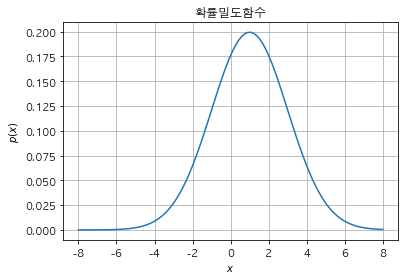

In [34]:
#연속확률 -> 밀도함수
xx = np.linspace(-8, 8, 100)
# print(xx)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title('확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid()
plt.show()



- 누적분포함수(cumulative distibution function)

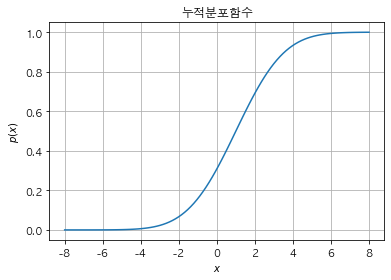

In [36]:

xx = np.linspace(-8, 8, 100)
# print(xx)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.title('누적분포함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.grid()
plt.show()

- 랜덤 표본 생성(random variable sampling)

In [41]:
#size = 표본 생성시 생성될 표본 크기
#random_state = 표본 생성시 사용되는 시드(seed)값
rv.rvs(size=(3,5), random_state=0)

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ,  4.73511598],
       [-0.95455576,  2.90017684,  0.69728558,  0.7935623 ,  1.821197  ],
       [ 1.28808714,  3.90854701,  2.52207545,  1.24335003,  1.88772647]])

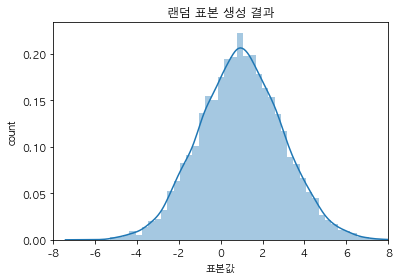

In [43]:
import seaborn as sns
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.title('랜덤 표본 생성 결과')
plt.xlabel('표본값')
plt.ylabel('count')
plt.xlim(-8, 8)
plt.show()


--------

### 1.베르누이 분포(Bernoulli distribution)
- $Bern(x;\mu) = \mu^x(1 - \mu)^(1-x) $

In [17]:
def Bern(p):
  x_set = np.array([0,1])

  def f(x):
    if x in x_set:
      return p**x*(1-p)**(1-x)
    else:
      return 0
  
  return x_set, f

기대값 E(X): 0.3333
분산   V(X): 0.2222


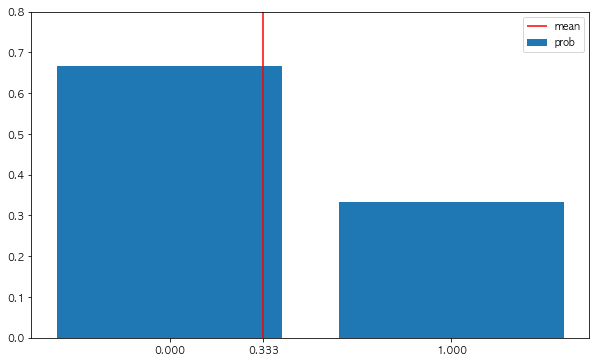

In [22]:
p = 1/3
x = Bern(p)
check_prob(x)
plot_prob(x)
# 수업시간 자료 확인해서 어떻게 쓰는지 정리해둘 것

#### * scipy.stats에 있는 베르누이분포 (bernoulli)함수 사용하기

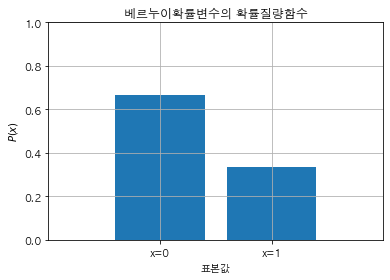

In [45]:
# mu = 확률
mu = 1/3
rv = sp.stats.bernoulli(mu)

xx = [0,1]
#이산확률분포 -> 확률질량함수 
#확률질량함수 (pmf) 메서드 사용
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1,2)
plt.ylim(0,1)
plt.xticks([0,1], ['x=0','x=1'])
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.title('베르누이확률변수의 확률질량함수')
plt.grid()
plt.show()

#### # 베르누이확률변수의 표본값을 무작위로 생성

0.27648


### [실습] 베르누이분포를 따르는 표본의 기대값과 분산을 구하고 그래프를 그리시오.
1. $mu = 0.5$, 표본이 10개인 경우, 
2. $mu = 0.5$,  표본이 100개인 경우

### 2.이항분포(binomial distributuin)

기대값 E(X): 3.0
분산   V(X): 2.1


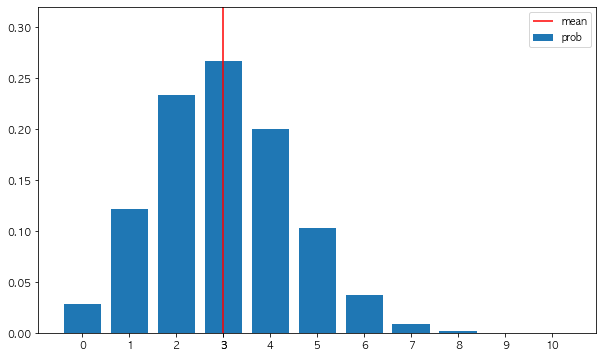

In [58]:
from scipy.special import comb
import numpy as np

def Bin(n, p):
  x_set = np.arange(n+1)
  
  def f(x):
    if x in x_set:
      return comb(n,x) * p ** x * (1-p) ** (n-x)
    else:
      return 0
    
  return x_set, f


n = 10
p =0.3
x = Bin(n,p)
x

check_prob(x)
plot_prob(x)









#### [예제]  이항분포 확률 구하기

최근의 한 통계에 의하면 우리나라 고등학생 중 40%가 담배를 피운다고 조사되었다. 만약 6명의 고등학생을 무작위로 추출한다면, 그 중에서 3명이 담배를 피울 확률을 구하시오

In [63]:
def prob(n, p, x):
  return comb(n,x) * p**x * (1-p)**(n-x)

n = 6
p = 0.4
x = 3

prob(n,p,x)


0.27648

#### * scipy.stats에 있는 이항분포의 (binom)함수 사용하기

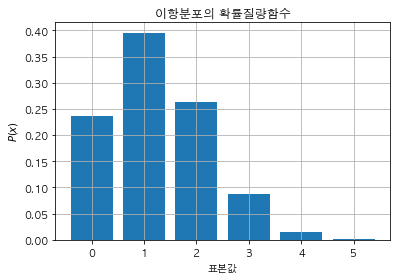

In [59]:
n = 5
mu = 0.25
rv = sp.stats.binom(n, mu)

xx = np.arange(n+1)
plt.bar(xx, rv.pmf(xx), align='center')
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.title('이항분포의 확률질량함수')
plt.grid()
plt.show()



#### 이항분포 확률변수의 표본값을 무작위로 생성

In [ ]:
mu = 1/3
rv = sp.stats.bernoulli(mu)
rv = rv.random_state(1)







### [실습] 이항분포 그래프 그리기
표본이 10,  확률이 0.3, 0.5, 0.7 인 그래프를 하나의 그래프에 그리시오

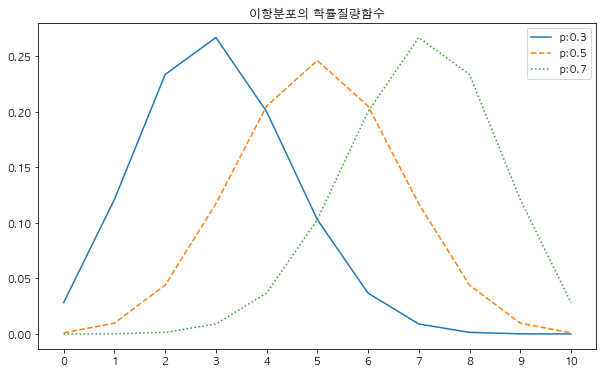

In [62]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
linestyle = ['-', '--', ':']

n = 10
p = [0.3,0.5,0.7]
x = np.arange(n+1)

for p, ls in zip(p, linestyle):
  rv = sp.stats.binom(n,p)
  ax.plot(x, rv.pmf(x), label=f'p:{p}',linestyle=ls)

ax.set_xticks(x)
ax.legend()
plt.title('이항분포의 학률질량함수')
plt.show()

### 3.기하분포(geometric distributuin)

#### * scipy.stats에 있는 기하분포의 (geom)함수 사용하기

#### 기하분포 확률변수의 표본값을 무작위로 생성

### 4.포하송 분포(poisson distributuin)

#### * scipy.stats에 있는 포아송분포의 (poisson)함수 사용하기

#### 포아송분포 확률변수의 표본값을 무작위로 생성

### 5.다항 분포(multinomial distribution) : 카데고리분포


#### * scipy.stats에 있는 다항분포의 (multinomial)함수 사용하기

[1 2 3 4 5 6]
   1  2  3  4  5  6
0  1  0  0  0  0  0
1  0  1  0  0  0  0
2  0  0  1  0  0  0
3  0  0  0  1  0  0
4  0  0  0  0  1  0
5  0  0  0  0  0  1


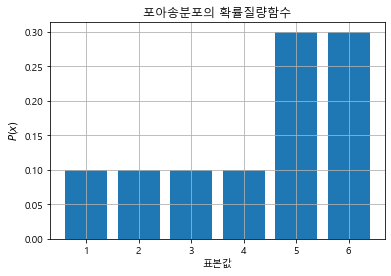

In [92]:
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1, mu)

xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx) # one-hot-encoding
print(xx)
print(xx_ohe)

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.xlabel('표본값')
plt.ylabel('$P(x)$')
plt.title('포아송분포의 확률질량함수')
plt.grid()
plt.show()

[[0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]]
[0.1  0.15 0.13 0.07 0.33]


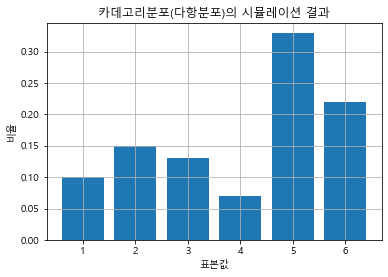

In [98]:
np.random.seed(1)
X = rv.rvs(100)
Y = X.sum(axis=0) / float(len(x))
print(X[:5])
print(Y[:5])

plt.bar(np.arange(1,7), Y)
plt.xlabel('표본값')
plt.ylabel('비율')
plt.title('카데고리분포(다항분포)의 시뮬레이션 결과')
plt.grid()
plt.show()

------------------------------

## 2.연속확률분포

### 연속확률변수에서 다룬 내용(함수)

- 상태구간

In [107]:
x_range = np.array([0,4])
x_range

array([0, 4])

- 확률밀도함수

In [108]:
def f(x):
    if x_range[0] < x <= x_range[1]:
        return (1/8*x)
    else:
        return 0

- 확률변수

In [109]:
X = [x_range, f]

- 확률(면적) 구하기

In [110]:
from scipy import integrate

integrate.quad(f, 2, 3)  #f:피적분함수, 2,3: 적분범위   
#결과값: (0.3125, 3.469446951953614e-15)=(적분값, 추정오차)

(0.3125, 3.469446951953614e-15)

- 기대값:평균

In [111]:
def E(X, g=lambda x:x):
    x_range, f = X
    
    def integrand(x):
        return g(x) * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]

E(X)

2.66666666666506

- 분산

In [112]:
def V(X, g=lambda x:x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x)-mean)**2 * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]

V(X)

0.888888888889912

In [113]:
def check_prob(X):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf), 4)
    
    print(f'기대값 E(X): {E(X):.4}')
    print(f'분산   V(X): {V(X):.4}')    
    
check_prob(X)

기대값 E(X): 2.667
분산   V(X): 0.8889


- 확률

In [114]:
def get_prob(X, a, b):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, a, b), 4)
    
    print(f'확률: {prob_sum[0]}')

- 누적분포함수

In [115]:
def F(x):
    return integrate.quad(f,-np.inf, x)[0]    #(-np.inf, np.inp: 무한대)

F(3) - F(2)

0.3124999999999945

- 그래프

In [116]:
def plot_prob(X, x_min, x_max):
    x_range, f = X
    
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
        
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    
    
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray', linestyle='--')
    ax.legend()

    plt.show()   


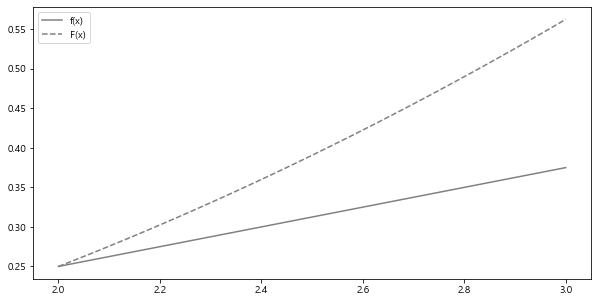

In [117]:
plot_prob(X, 2, 3)

### 1. 정규분포

### [실습] 정규분포를 이용한 확률 구하기
남자 고등학생 키의 평균이 170cm이고 표준편차가 5cm라면, 우연히 만난 남자 고등학생의 키는 N(170, 5^2)를 따른 다고 할 수 있다. 이 사실을 바탕으로 우연히 만난 남자 고등학생의 키가 165cm이상 175cm 이하일 확률은?

### [실습] 정규분포를 이용한 확률 구하기
모의고사 평균 점수가 70점이고 표준편차가 8점이라면, 우연히 만난 학생의 점수는 N(70, 8^2)을 따른다고 할 수 있다. 이 사실을 바탕으로 우연히 만난 학생의 점수가 54점 이상 86점 이하일 확률은?

#### * scipy.stats에 있는 정규분포의 (norm)함수 사용하기

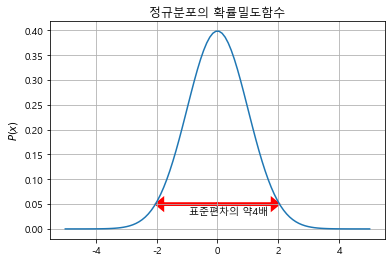

#### 정규분포 확률변수의 표본값을 무작위로 생성

### [실습] 정규분포 그래프 예제  : (미국 나스닥 수익율)
pandas_datareader 라이브러리의 DataReader 함수는 웹 상의 데이터를 DataFrame 객체로 만드는 기능을 제공함

---------